Jumlah data kosong per kolom:
product_id          0
product_title       0
rating              0
summary             0
review              0
location         1293
date                0
upvotes             0
downvotes           0
dtype: int64
         product_id                                      product_title  \
0  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
1  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
2  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
3  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
4  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   

   rating            summary  \
0       5  Terrific purchase   
1       5  Terrific purchase   
2       5             Super!   
3       5             Super!   
4       5  Terrific purchase   

                                              review       location  \
0  1-more flexible2-bass is very high3-sound clar.

C:\Users\USER\AppData\Local\Temp\ipykernel_20248\610039451.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["rating"], palette="coolwarm")


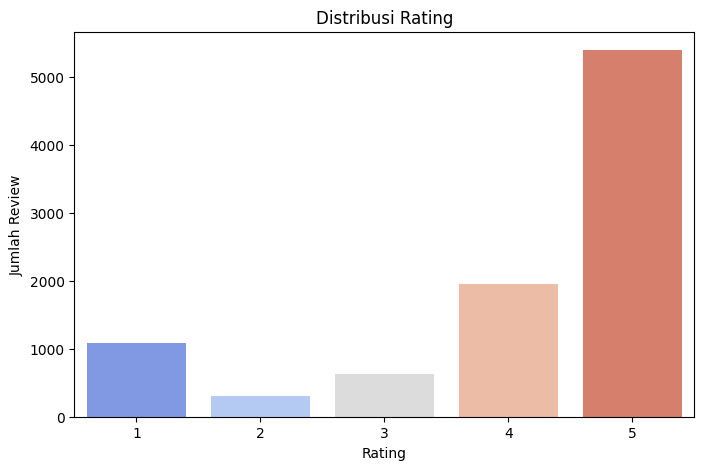

                                              review  rating sentiment
0  1-more flexible2-bass is very high3-sound clar...       5  Positive
1     Super sound and good looking I like that prize       5  Positive
2  Very much satisfied with the device at this pr...       5  Positive
3  Nice headphone, bass was very good and sound i...       5  Positive
4  Sound quality super battery backup super quali...       5  Positive


C:\Users\USER\AppData\Local\Temp\ipykernel_20248\610039451.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["sentiment"], palette="coolwarm", order=["Negative", "Neutral", "Positive"])


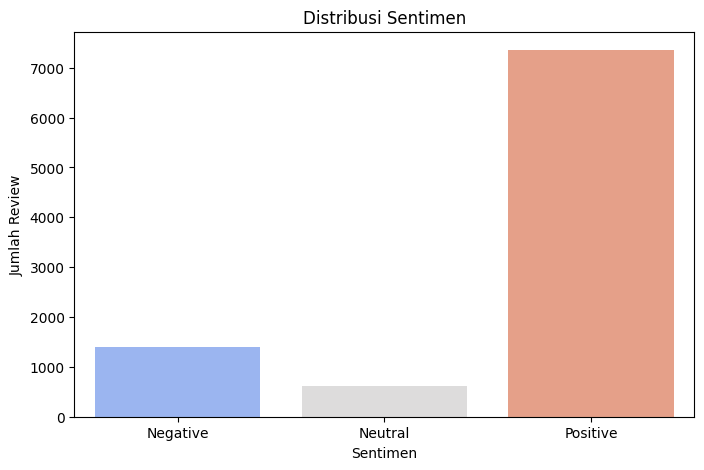

                                              review  \
0  1-more flexible2-bass is very high3-sound clar...   
1     Super sound and good looking I like that prize   
2  Very much satisfied with the device at this pr...   
3  Nice headphone, bass was very good and sound i...   
4  Sound quality super battery backup super quali...   

                                      cleaned_review  
0  more flexiblebass is very highsound clarity is...  
1     super sound and good looking i like that prize  
2  very much satisfied with the device at this pr...  
3  nice headphone bass was very good and sound is...  
4  sound quality super battery backup super quali...  


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


                                      cleaned_review  \
0  more flexiblebass is very highsound clarity is...   
1     super sound and good looking i like that prize   
2  very much satisfied with the device at this pr...   
3  nice headphone bass was very good and sound is...   
4  sound quality super battery backup super quali...   

                                              tokens  
0  [more, flexiblebass, is, very, highsound, clar...  
1  [super, sound, and, good, looking, i, like, th...  
2  [very, much, satisfied, with, the, device, at,...  
3  [nice, headphone, bass, was, very, good, and, ...  
4  [sound, quality, super, battery, backup, super...  
                                              tokens  \
0  [more, flexiblebass, is, very, highsound, clar...   
1  [super, sound, and, good, looking, i, like, th...   
2  [very, much, satisfied, with, the, device, at,...   
3  [nice, headphone, bass, was, very, good, and, ...   
4  [sound, quality, super, battery, backup, super... 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...


                                     filtered_tokens  \
0  [flexiblebass, highsound, clarity, good, batte...   
1         [super, sound, good, looking, like, prize]   
2  [much, satisfied, device, price, point, awesom...   
3  [nice, headphone, bass, good, sound, clear, pu...   
4  [sound, quality, super, battery, backup, super...   

                                   lemmatized_tokens  
0  [flexiblebass, highsound, clarity, good, batte...  
1         [super, sound, good, looking, like, prize]  
2  [much, satisfied, device, price, point, awesom...  
3  [nice, headphone, bass, good, sound, clear, pu...  
4  [sound, quality, super, battery, backup, super...  


In [ ]:
#==============================================#
# STEP 1: EXPLORASI AND PRE-PROCESSING DATA
#==============================================#

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

# 1. Load dataset
df = pd.read_csv(r"C:\Users\USER\OneDrive\Documents\Documents\Kuliah Semester 6\[DS] Pemrosesan Bahasa Alami\Tugas\Tugas 1\NPL BERT & Naive Bayes Models\dataset\product_review_electronic.csv")

# 2. Cek missing values
print("Jumlah data kosong per kolom:")
print(df.isnull().sum())

# Hapus data yang kosong di kolom review atau rating
df = df.dropna(subset=["review", "rating"])

# 3. Tampilkan beberapa sampel data
print(df.head())

# 4. Cek jumlah data dan tipe data
print(df.info())

# 5. Cek distribusi rating
plt.figure(figsize=(8,5))
sns.countplot(x=df["rating"], palette="coolwarm")
plt.xlabel("Rating")
plt.ylabel("Jumlah Review")
plt.title("Distribusi Rating")
plt.show()

# 6. Konversi rating ke sentimen
def convert_rating_to_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

df["sentiment"] = df["rating"].apply(convert_rating_to_sentiment)

# Cek hasil konversi
print(df[["review", "rating", "sentiment"]].head())

# 7. Cek distribusi sentimen
plt.figure(figsize=(8,5))
sns.countplot(x=df["sentiment"], palette="coolwarm", order=["Negative", "Neutral", "Positive"])
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Review")
plt.title("Distribusi Sentimen")
plt.show()

# 8. Membersihkan teks (hapus karakter khusus, angka, ubah ke lowercase)
def clean_text(text):
    text = text.lower()  # Ubah ke huruf kecil
    text = re.sub(r"[^a-z\s]", "", text)  # Hanya menyisakan huruf dan spasi
    return text

df["cleaned_review"] = df["review"].apply(clean_text)

# Cek hasil pembersihan teks
print(df[["review", "cleaned_review"]].head())

# 9. Tokenisasi (ubah teks menjadi daftar kata)
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

df["tokens"] = df["cleaned_review"].apply(word_tokenize)

# Cek hasil tokenisasi
print(df[["cleaned_review", "tokens"]].head())

# 10. Menghapus Stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df["filtered_tokens"] = df["tokens"].apply(remove_stopwords)

# Cek hasil penghapusan stopwords
print(df[["tokens", "filtered_tokens"]].head())

# 11. Lemmatization (mengubah kata menjadi bentuk dasar)
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_words(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df["lemmatized_tokens"] = df["filtered_tokens"].apply(lemmatize_words)

# Cek hasil lemmatization
print(df[["filtered_tokens", "lemmatized_tokens"]].head())

In [ ]:
#=======================================================================================#
#STEP 2 REPRESENTASI TEKS (BoW, TF-IDF, Word Embeddings) CONVERTING STRING TO NUMERIK
#=======================================================================================#

#1. BAG OF WORD

from sklearn.feature_extraction.text import CountVectorizer

# Inisialisasi CountVectorizer
vectorizer_bow = CountVectorizer()

# Transformasi teks menjadi vektor BoW
X_bow = vectorizer_bow.fit_transform(df["cleaned_review"])

# Lihat ukuran matriks BoW
print("Shape dari BoW:", X_bow.shape)

# Contoh beberapa fitur (kata) yang dipakai
print("Fitur BoW:", vectorizer_bow.get_feature_names_out()[:20])


#2. TF-IDF (Term Frequency - Inverse Document Frequency)

from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer
vectorizer_tfidf = TfidfVectorizer()

# Transformasi teks menjadi vektor TF-IDF
X_tfidf = vectorizer_tfidf.fit_transform(df["cleaned_review"])

# Lihat ukuran matriks TF-IDF
print("Shape dari TF-IDF:", X_tfidf.shape)

# Contoh beberapa fitur (kata) yang dipakai
print("Fitur TF-IDF:", vectorizer_tfidf.get_feature_names_out()[:20])


#3. Word Embeddings (Word2Vec) (OPSIONAL KARENA UNTUK MODEL BERT SUDAH MEMILIKI TRANFORMER-BASED EMBEDDINGS)

import gensim
from gensim.models import Word2Vec

# Latih model Word2Vec dari data token yang telah diproses
model_w2v = Word2Vec(sentences=df["lemmatized_tokens"], vector_size=100, window=5, min_count=2, workers=4)

# Cek representasi vektor dari kata tertentu
print("Vektor kata 'app':", model_w2v.wv["app"])

# Lihat ukuran vektor per kata
print("Dimensi vektor Word2Vec:", model_w2v.wv.vector_size)

Shape dari BoW: (9374, 9892)
Fitur BoW: ['aa' 'aac' 'aachaaa' 'aafter' 'aalso' 'aame' 'aapka' 'aaplog' 'aayegi'
 'abd' 'abeast' 'ability' 'able' 'abnormal' 'aboce' 'abour' 'about'
 'aboutalso' 'above' 'abrorbs']
Shape dari TF-IDF: (9374, 9892)
Fitur TF-IDF: ['aa' 'aac' 'aachaaa' 'aafter' 'aalso' 'aame' 'aapka' 'aaplog' 'aayegi'
 'abd' 'abeast' 'ability' 'able' 'abnormal' 'aboce' 'abour' 'about'
 'aboutalso' 'above' 'abrorbs']
Vektor kata 'app': [-0.06824248  0.08945423  0.09668454  0.00322321  0.02681465 -0.4825126
  0.16401215  0.50581145 -0.11731102 -0.21643141 -0.18796885 -0.40205172
 -0.03131917 -0.04567583  0.05879211 -0.12358925 -0.12701324 -0.21588115
  0.17045574 -0.35158142  0.06700856  0.12541613  0.13696136 -0.0708195
 -0.05496204  0.14045098 -0.3075784  -0.09324326 -0.17665198  0.0202441
  0.19005726  0.00573198  0.10151286 -0.00080551 -0.23275374  0.27258012
  0.16438375 -0.15732521 -0.16681623 -0.32974726 -0.06694067 -0.11021402
  0.00564933  0.03044058  0.30393183 -0.075

In [ ]:
#======================================#
#STEP 3 : MODEL TRAINING (NAÏVE BAYES)
#======================================#

#1. Bagi Data Menjadi Training & Testing Set
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan label (y)
X = df["cleaned_review"]  # Teks review yang sudah dibersihkan
y = df["sentiment"]  # Label sentimen (Positive, Neutral, Negative)

# Bagi data 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))


#2. Konversi Teks ke Vektor (TF-IDF & BoW)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# BoW (Bag of Words)
vectorizer_bow = CountVectorizer()
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

# TF-IDF (Term Frequency - Inverse Document Frequency)
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

print("BoW shape:", X_train_bow.shape)
print("TF-IDF shape:", X_train_tfidf.shape)



#3. Train Model Naïve Bayes dengan TF-IDF

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Buat model Naïve Bayes
nb_model = MultinomialNB()

# Latih model dengan TF-IDF
nb_model.fit(X_train_tfidf, y_train)

# Prediksi
y_pred = nb_model.predict(X_test_tfidf)

print("Training Model Naïve Bayes Selesai!")

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 4. Simpan Model Naïve Bayes dan TF-IDF Vectorizer
import pickle
import os

# Buat folder models/ jika belum ada
os.makedirs("models", exist_ok=True)

# Simpan Model Naïve Bayes
with open("models/naive_bayes_model.pkl", "wb") as f:
    pickle.dump(nb_model, f)

# Simpan TF-IDF Vectorizer
with open("models/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer_tfidf, f)

Jumlah data latih: 7499
Jumlah data uji: 1875
BoW shape: (7499, 8759)
TF-IDF shape: (7499, 8759)
Training Model Naïve Bayes Selesai!
Accuracy: 0.8304
              precision    recall  f1-score   support

    Negative       0.93      0.21      0.35       268
     Neutral       0.00      0.00      0.00       105
    Positive       0.83      1.00      0.90      1502

    accuracy                           0.83      1875
   macro avg       0.59      0.40      0.42      1875
weighted avg       0.80      0.83      0.77      1875



C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

In [ ]:
#=================================#
#STEP 4: MODEL TRAINING (BERT)
#=================================#

import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset, random_split
import torch.optim as optim
from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report

# 1. Load Tokenizer dan Model BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

# 2. Konversi Label Sentimen ke Angka
label_mapping = {"Negative": 0, "Neutral": 1, "Positive": 2}
df["sentiment_label"] = df["sentiment"].map(label_mapping)

# 3. Tokenisasi Semua Teks
def encode_texts(texts, max_length=128):
    return tokenizer(texts.tolist(), padding=True, truncation=True, max_length=max_length, return_tensors="pt")

X_encoded = encode_texts(df["cleaned_review"])
y_encoded = torch.tensor(df["sentiment_label"].values)

# 4. Buat Dataset PyTorch
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = self.labels[idx]
        return item

dataset = SentimentDataset(X_encoded, y_encoded)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# 5. Dataloader untuk Training
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# 6. Training Model BERT
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = optim.AdamW(model.parameters(), lr=5e-5)

epochs = 1  # Target 1 epoch

for epoch in range(epochs):
    model.train()
    loop = tqdm(train_loader, leave=True)
    
    for batch in loop:
        batch = {key: val.to(device) for key, val in batch.items()}  
        optimizer.zero_grad()
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        loop.set_description(f"Epoch {epoch+1}")
        loop.set_postfix(loss=loss.item())

print("Training Model Bert Selesai!")

# 7. Evaluasi Model BERT
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for batch in test_loader:
        batch = {key: val.to(device) for key, val in batch.items()}
        outputs = model(**batch)
        predictions = torch.argmax(outputs.logits, dim=-1)
        
        y_true.extend(batch["labels"].cpu().numpy())
        y_pred.extend(predictions.cpu().numpy())

# Evaluasi dengan Sklearn
print("Hasil Evaluasi Model BERT:")
print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(classification_report(y_true, y_pred, target_names=["Negative", "Neutral", "Positive"]))


# 8. Simpan Model BERT
# Buat folder models/ jika belum ada
os.makedirs("models/bert_model", exist_ok=True)

# Simpan model BERT
model.save_pretrained("models/bert_model")
tokenizer.save_pretrained("models/bert_model")

print("Model BERT telah disimpan di folder models/bert_model/")

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\USER\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/ho

Training Model Bert Selesai!
Hasil Evaluasi Model BERT:
Accuracy: 0.9067
              precision    recall  f1-score   support

    Negative       0.80      0.91      0.85       281
     Neutral       0.80      0.03      0.06       126
    Positive       0.93      0.98      0.95      1468

    accuracy                           0.91      1875
   macro avg       0.84      0.64      0.62      1875
weighted avg       0.90      0.91      0.88      1875

Model BERT telah disimpan di folder models/bert_model/
